# E-COMMERCE CUSTOMER SEGMENTATION

THIS IS THE PROJECT WHERE WE USE THE E-COMMERECE DATA,WE USE THE KMEANS CLUSTERING MACHINE LEARNING ALOGRITHM TO CLUSTER THE CUSTOMER WITH SIMILAR INTRESTS.

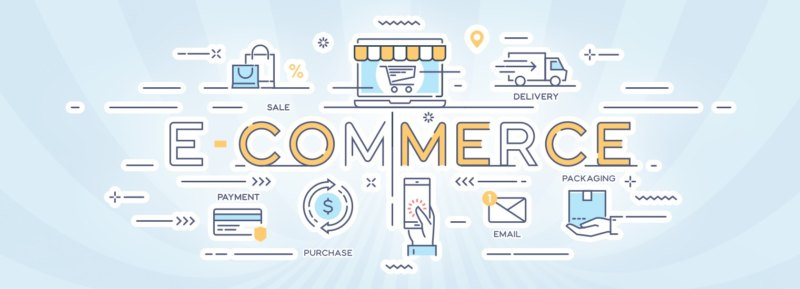



# K MEANS CLUSTERING ALORITHM

i) K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

ii) Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

iii) It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

iv) It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

v) It is a centroid-based algorithm, where each cluster is associated with a centroid.

vi) The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

# ABOUT THE DATA SET

The data was collected from a well known e-commerce website over a period of time based on the customer’s search profile.

It has the following data columns:

1) Cust_ID : Unique numbering for customers

2) Gender : Gender of the customer

3) Orders : Number of orders placed by each customer in the past.

Remaining 35 features which are the brands of the respected product that are available in the market.

And these columns contains the number of times customers have searched the particular brands.

# KMEANS CLUSTERING FOR THE E-COMMERCE CUSTOMER SEGMENTATION.

# PROBELM STATEMENT:

Given the e-commerce data, use k-means clustering algorithm to cluster
customers with similar interest.

# STEP 01: Importing the libraries
In order to proceed further we have to import the required libraries in which the python environment we are working.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
from sklearn.preprocessing import StandardScaler

# STEP 02: Importing the data
So the next step is to upload the dataset to the python environment.

In [50]:
# !pip install nltk
!pip install numpy pandas matplotlib nltk scikit-learn


In [2]:
df=pd.read_excel("D:\Python\Projects\E-Commerce-Customer-Segmentation\cust_data.xlsx")
# If the file is in the form of a excel sheet then add pd.read_excel("path") to load the file.

# STEP 03: Exploring the data
In data Exploration we see the raw data which is suitable for further processing and analysis.

In [3]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
df.columns
# To see the columns in detail.

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

# NOTE

It is good to check if we have anykind of unique value in our dataset

In [6]:
df["Gender"].unique() # Its clearly shown that we have three kinds of unique values in the gender column.

array(['M', 'F', nan], dtype=object)

In [7]:
df.isnull().sum() # It seems to have null values in the gender column which is alredy seen in the previous cell.

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

Its clear from the previous cell that we have null values in the data set and which has to treated in the data preprocessing step.

In [8]:
df.describe() # Here the python have dropped the gender column because its a object.

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


Text(0.5, 1.0, 'Graph for the Described Values')

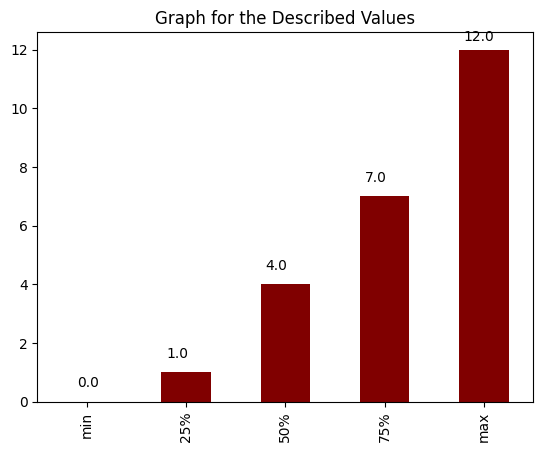

In [9]:
df.Orders.describe()[3:].plot(kind='bar',color='maroon')
plt.text(x=-.1,y=df.Orders.describe()[3]+.5,s=str(df.Orders.describe()[3]))
plt.text(x=0.8,y=df.Orders.describe()[4]+.5,s=str(df.Orders.describe()[4]))
plt.text(x=1.8,y=df.Orders.describe()[5]+.5,s=str(df.Orders.describe()[5]))
plt.text(x=2.8,y=df.Orders.describe()[6]+.5,s=str(df.Orders.describe()[6]))
plt.text(x=3.8,y=df.Orders.describe()[7]+0.3,s=str(df.Orders.describe()[7]))
plt.title("Graph for the Described Values")

# Here we are just plotting a bar graph to view the values that we described in the df.describe() function.

In [10]:
df.shape
# .shape will give the shape of a DataFrame like this dataframe has 30k rows and 38 columns.

(30000, 38)

# STEP 04: Preprocessing the data
In Data Preprocessing we handle the null values that we present in the data set.

We encode the object values so that it is suitable for applying the algorithm.

01) DEALING WITH NULL VALUES.

In [11]:
df['Gender'].isnull().sum()
# .isnull().sum() tells us the number of missing values in the dataset.

2724

Text(0.5, 1.0, 'Missing value Percentage')

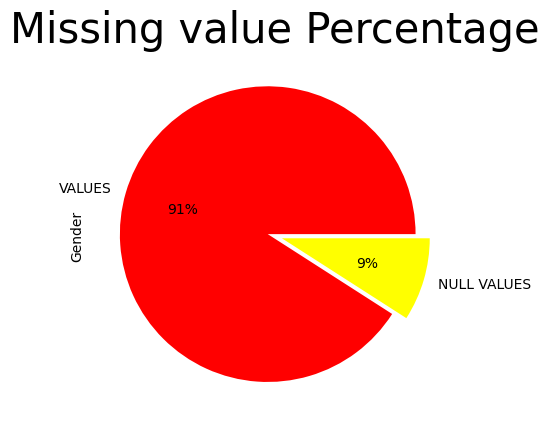

In [12]:
colors = ['red', 'yellow']
# This will tell which colours we want our pie chart should be.
labels = ['VALUES', 'NULL VALUES']


explode = (0.05, 0.05)
# Define the ratio of gap of each fragment in a tuple

fig=df.Gender.isna().value_counts().plot(kind='pie',autopct='%1.0f%%',colors=colors,labels=labels, explode=explode)

plt.title("Missing value Percentage",fontsize=30)


In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df.isnull().sum().sum()
# .fillna() will replace the NULL values with a specified value which we give.
# .mode() is the value that appears most often.
# .isnull().sum().sum() will count the NULL values that are present in the entire data frame.

0

In [14]:
df['Gender'].value_counts()
# .value_counts() will tell us the total no. of values present in the specific column.

F    24778
M     5222
Name: Gender, dtype: int64

02) ENCODING THE GENDER COLUMN SINCE IT HAS OBJECT VALUES.

In [15]:
df["Gender"].unique()
# Since the gender column has two object values ithas to be encoded or mapped.
# It has only two values so we choose mapping.

array(['M', 'F'], dtype=object)

In [16]:
df["Gender"] = df['Gender'].map({'M':1, 'F':2})
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [17]:
df_1=df.copy(deep=True)
df_1.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


03) REMOVING THE COLUMNS THAT ARE UNNECESSARY.

In [18]:
df_1

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_1.drop(columns = ['Cust_ID','Gender','Orders'],axis=1, inplace = True)
# .drop command will remove the mentioned column in the dataset
# inplace = True tells that the change should be permanent.
# We are dropping the Gender andthe Orders column because those are not needed for segmentation.

In [20]:
df_1.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


04) STANDARD SCALING THE DATASET

In order to get the good k value we have to do scaling because it is used for making data points generalized so that the distance between them will be lower.

In [28]:
scale=StandardScaler()
df_01=scale.fit_transform(df_1)
df_01=scale.transform(df_01)
df_01
# Do name the scaled dataset other than original dataset name because when use the same dataset variable name it may use the unscaled data.

array([[-0.74524379, -0.86491294, -0.50782431, ..., -0.84408789,
        -0.77270672, -0.65395523],
       [-0.74524379,  1.14502464, -0.50782431, ..., -0.84408789,
        -0.77270672, -0.65395523],
       [-0.74524379,  1.14502464, -0.50782431, ...,  4.17031685,
        -0.77270672, -0.65395523],
       ...,
       [-0.74524379,  1.14502464, -0.50782431, ..., -0.84408789,
        -0.77270672, -0.65395523],
       [-0.74524379, -0.86491294, -0.50782431, ..., -0.84408789,
        -0.77270672, -0.65395523],
       [ 2.34286261, -0.86491294, -0.50782431, ..., -0.84408789,
        -0.77270672, -0.65395523]])

In [29]:
df_01=pd.DataFrame(df_01,columns=df_1.columns)
df_01

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.745244,-0.864913,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,6.085945,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
1,-0.745244,1.145025,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,1.047660,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
2,-0.745244,1.145025,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,4.170317,-0.772707,-0.653955
3,-0.745244,-0.864913,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
4,-0.745244,-0.864913,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,-0.910232,2.345508,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,5.500158,5.991747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.745244,-0.864913,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,3.574247,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
29996,-0.745244,1.145025,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
29997,-0.745244,1.145025,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,2.755749,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
29998,-0.745244,-0.864913,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955


In this E-commerce Dataset we dont see that much of Outliers that has to be clipped off from the dataset.

# STEP 05: Visualizing the data
Since the data is full of numbers and floats it is more efficient and easy to view it in a pictorial or in a graphical form.

In [30]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


<Axes: xlabel='Orders', ylabel='Density'>

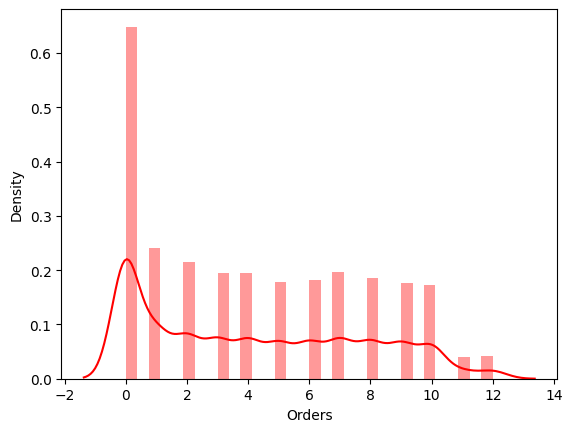

In [32]:
import seaborn as sns
sns.distplot(df['Orders'],color='red')
# Here we see the normal distribution graph fot the Order column.

<Axes: xlabel='Gender', ylabel='Density'>

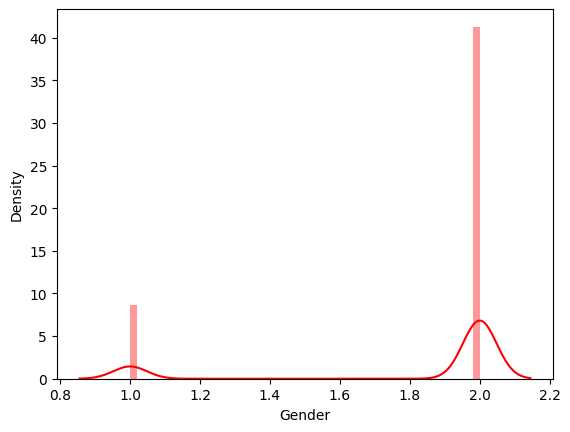

In [33]:
sns.distplot(df['Gender'],color='red')
# Here we see the normal distribution graph fot the Order column.

<Axes: ylabel='count'>

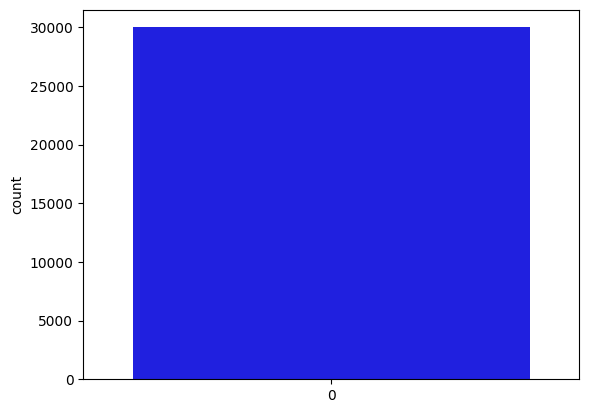

In [34]:
sns.countplot(df.Gender,label='count',color='blue')
# Here we see how the data in this particular column which is biased.

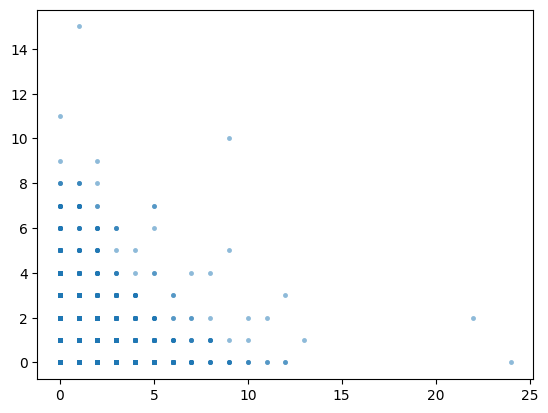

In [35]:
plt.scatter(df_1.iloc[:, 0].values, df_1.iloc[:, 1].values, marker=".", s=50, lw=0, alpha=0.5,edgecolor="black")
plt.show()
# The scatter plot that is before applying the k-means alogrithm.

# STEP 06: Finding the K-value for the data

As mentioned in the problem statment the k value for this dataset has to found on the  silhouette method.

SILHOUETTE SCORE METHOD:

1) The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

2) The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

              S(i)=b(i)-a(i)/max{a(i),b(i)}

where

    -->S(i) is the silhouette coefficient of the data point i.

    -->a(i) is the average distance between i and all the other data points in the cluster to which i belongs.

    -->b(i) is the average distance from i to all clusters to which i does not belong.


01) USING A NORMAL FOR LOOP

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
n_clusters=[2,3,4,5]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_01)

    score=silhouette_score(df_01,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is{})".format(k, score))

For n_clusters = 2, silhouette score is0.4654510471845757)
For n_clusters = 3, silhouette score is0.4761144186776465)
For n_clusters = 4, silhouette score is0.40085245674749553)
For n_clusters = 5, silhouette score is0.4718452717557038)


02) USING THE KELbowVisualizer LIBRARY

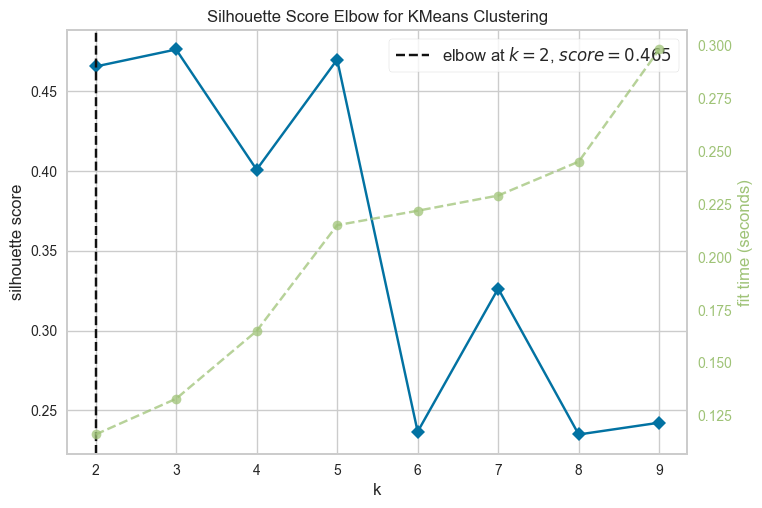

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df_01)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

03) USING make_blobs LIBRARY

In [41]:
from sklearn.datasets import make_blobs
df_01, y = make_blobs(n_samples=30000, n_features=35, centers=4, random_state=10)
for n_clusters in range(3,8):
    km=KMeans(n_clusters=n_clusters, random_state=10)
    result=km.fit_predict(df_01)

    score=silhouette_score(df_01,result,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

 # The make_blob library determines random number generation for dataset creation

For n_clusters = 3, silhouette score is 0.6214665771968824)
For n_clusters = 4, silhouette score is 0.7973718598449924)
For n_clusters = 5, silhouette score is 0.6033460180865866)
For n_clusters = 6, silhouette score is 0.4093496625000387)
For n_clusters = 7, silhouette score is 0.21376150086431223)


In [44]:
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples

For n_clusters = 2, silhouette score is 0.4973726949479975)
For n_clusters = 3, silhouette score is 0.6214665771968824)
For n_clusters = 4, silhouette score is 0.7973718598449924)
For n_clusters = 5, silhouette score is 0.6033460180865866)
For n_clusters = 6, silhouette score is 0.4093496625000387)
For n_clusters = 7, silhouette score is 0.21376150086431223)


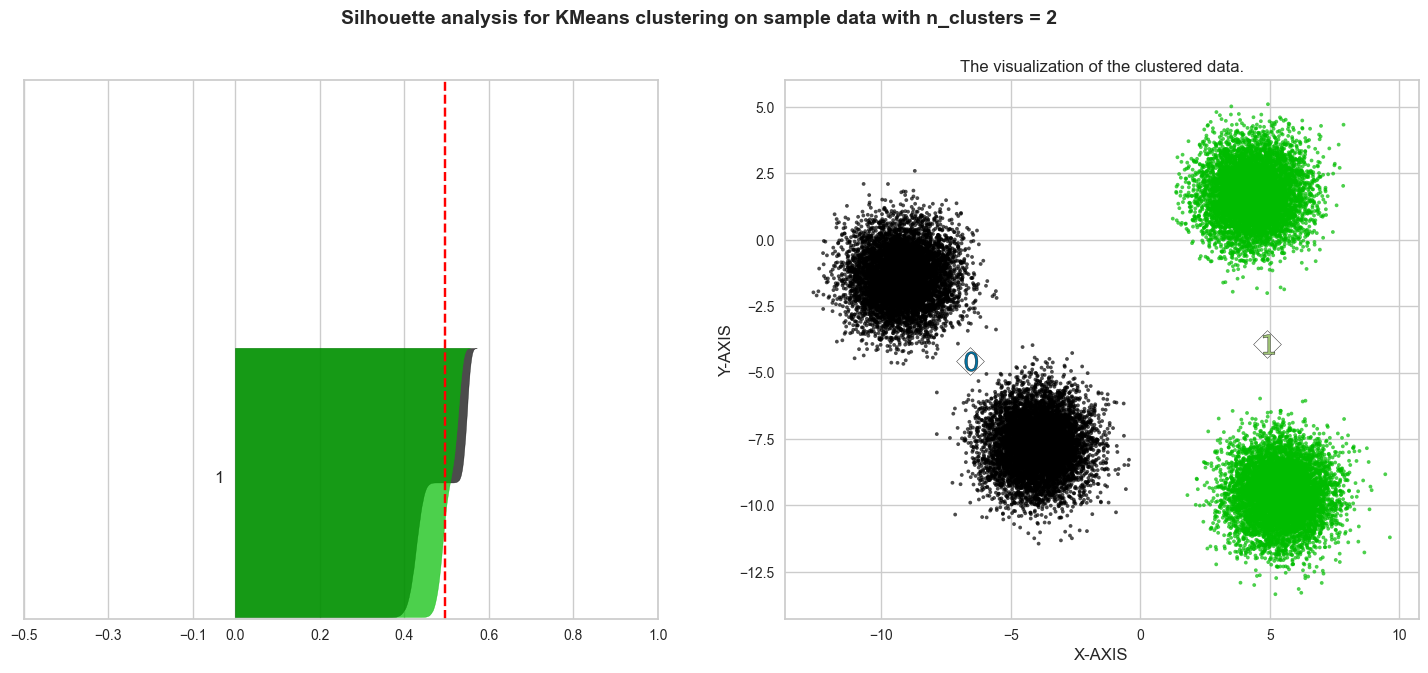

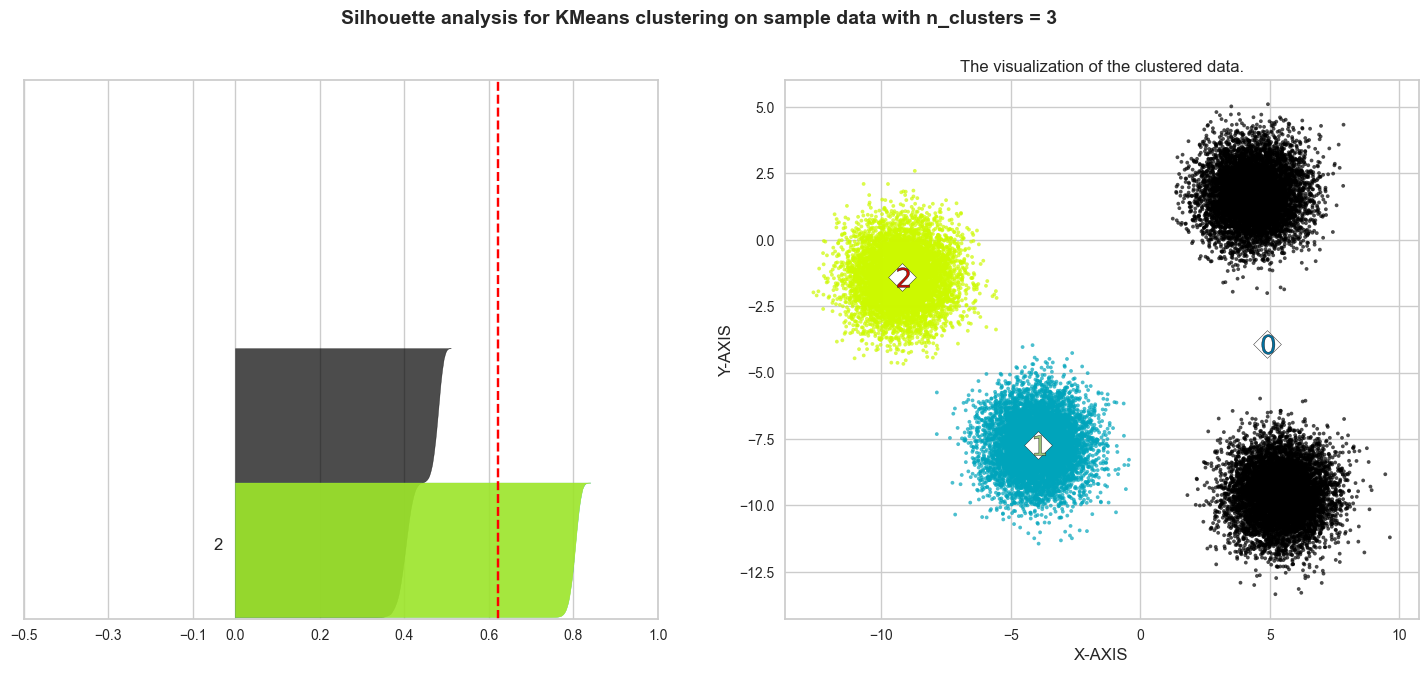

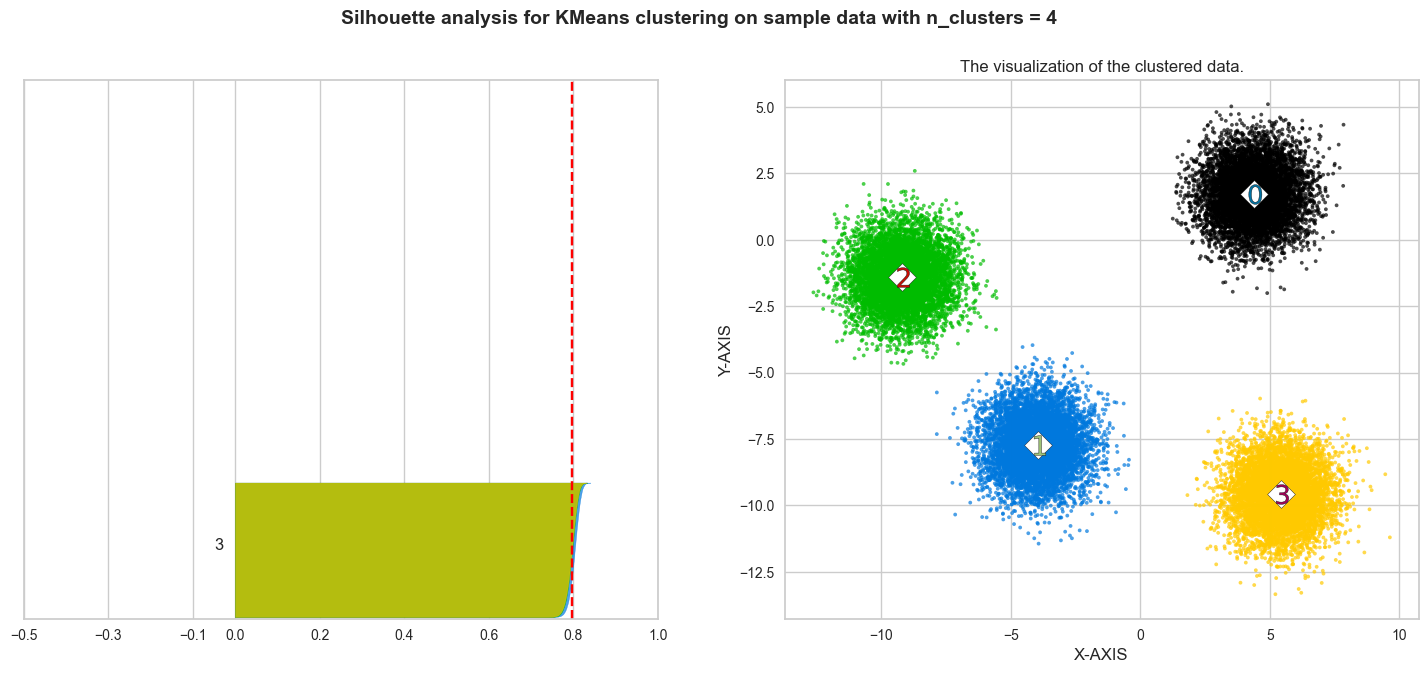

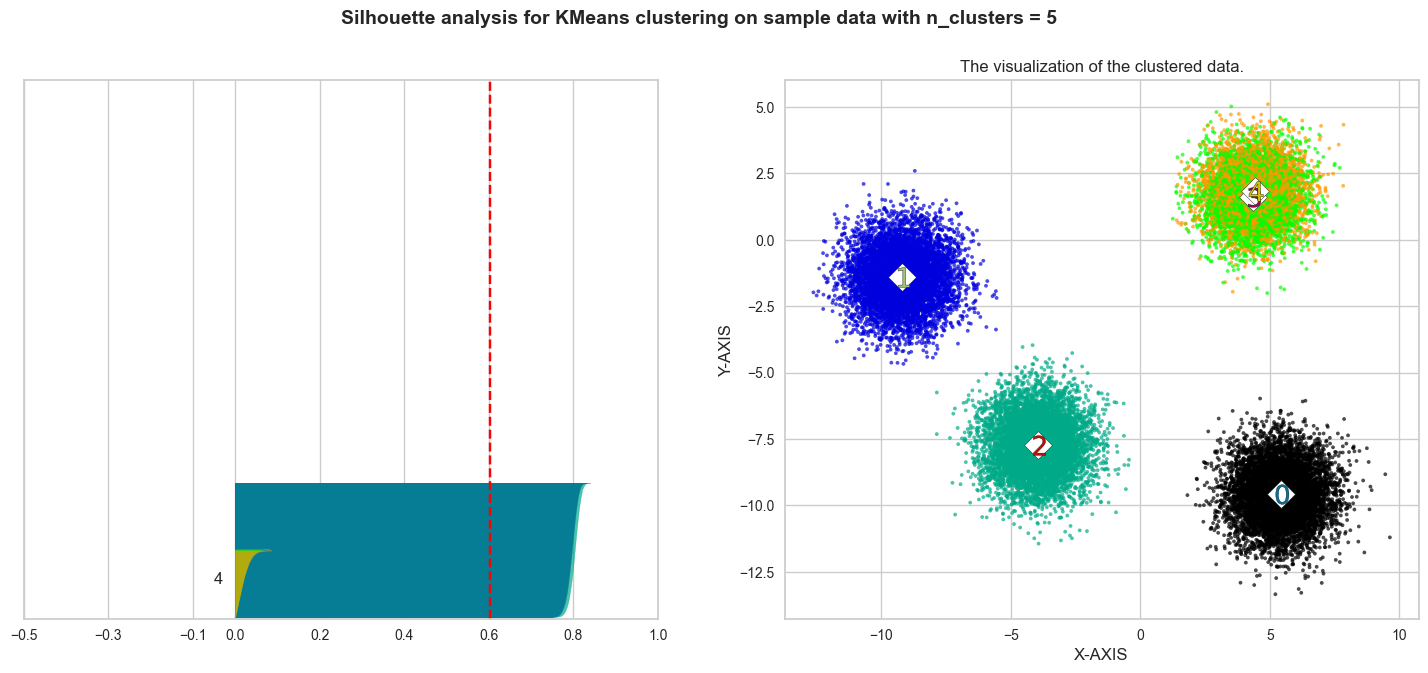

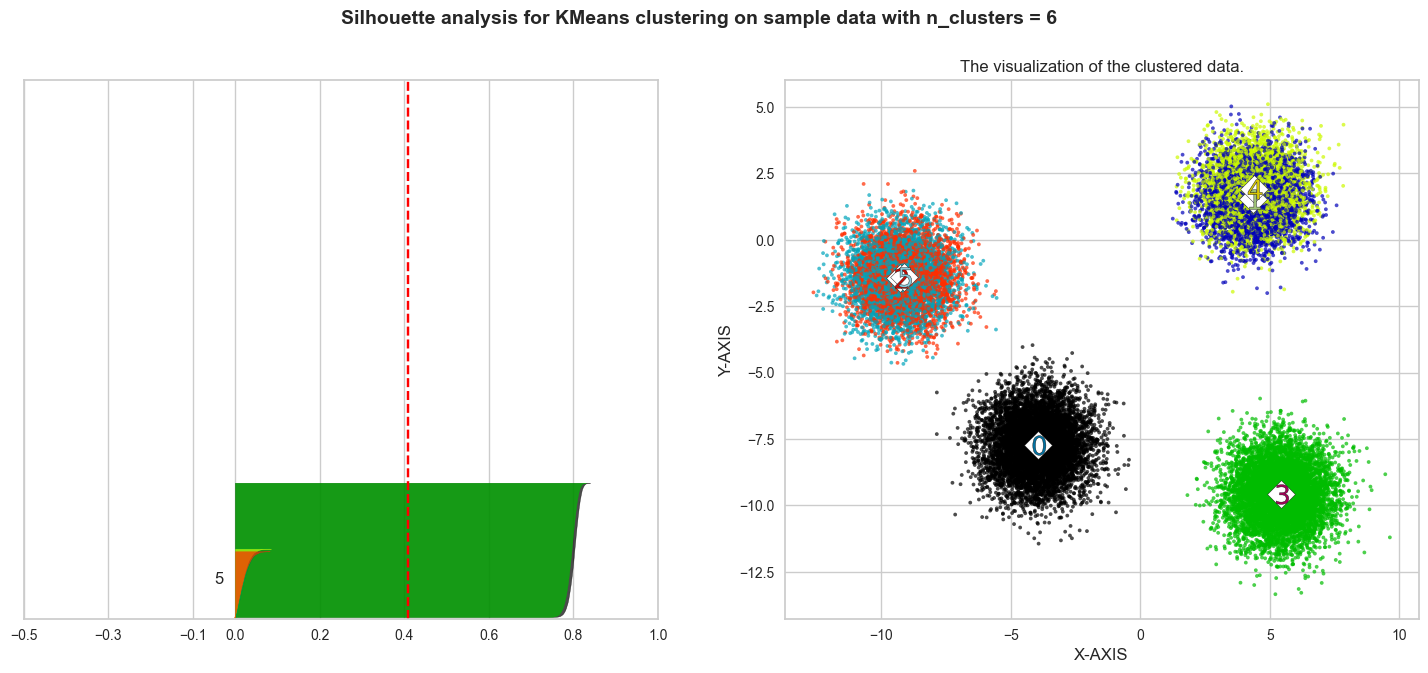

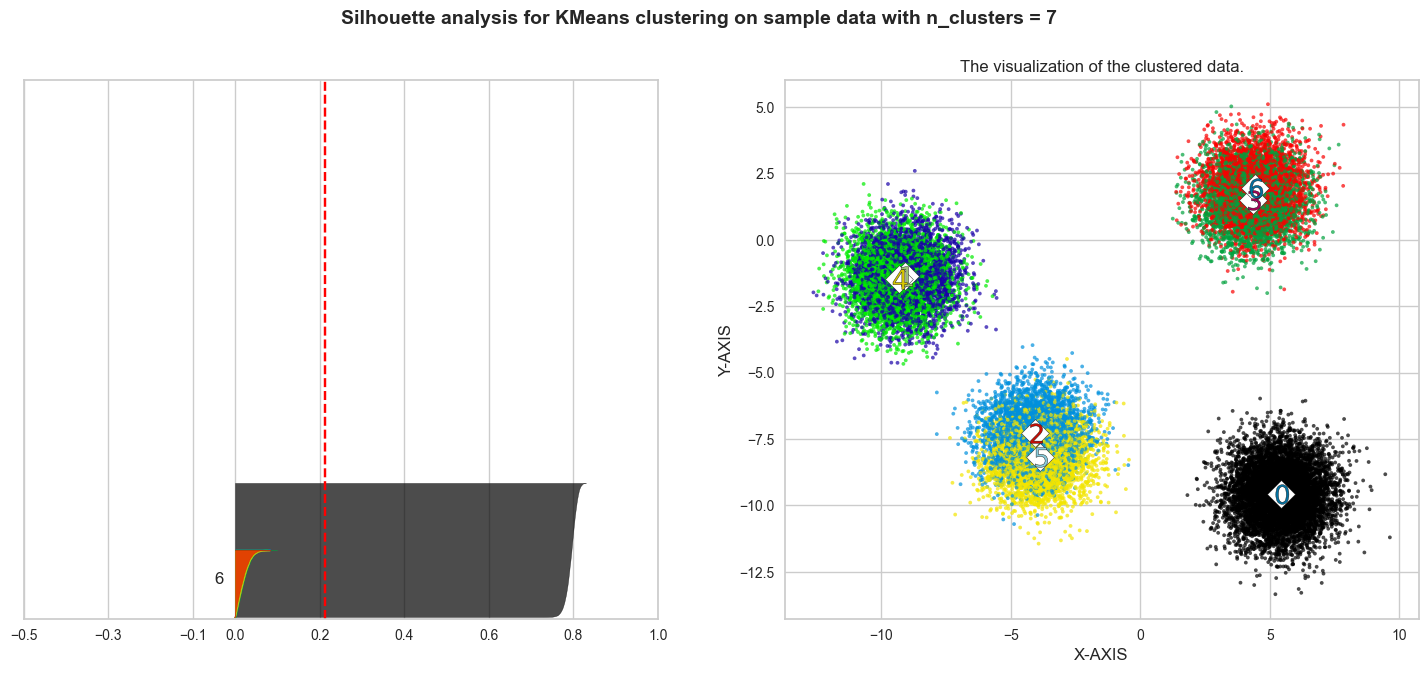

In [45]:
#STEP 01:
df_01, y = make_blobs(n_samples=30000, n_features=35, centers=4, random_state=10)
for n_clusters in range(2,8):
    fig, (ax1, ax2) = plt.subplots(1, 2) # Create a subplot with 1 row and 2 columns
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.5, 1])              # The 1st subplot is the silhouette plot
    ax1.set_ylim([0, len(df_01) + (n_clusters + 1) * 20])  # The silhouette coefficient can range from -1, 1 but in this example all lie within [-1, 1]

    # Initialize the km with n_clusters value and a random generator
    # seed of 20 for reproducibility.

    km=KMeans(n_clusters=n_clusters, random_state=10)   ## The (n_clusters+1)*10 is for inserting blank space between silhouette
    result=km.fit_predict(df_01)   ## plots of individual clusters, to demarcate them clearly.
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters

    score=silhouette_score(df_01,result,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
# STEP 02:

    # Calculating the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_01, result)

    y_lower = 100
    for i in range(n_clusters):
        # Adding the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[result == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )


    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, -0.3, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(result.astype(float) / n_clusters)
    ax2.scatter(
        df_01[:, 0], df_01[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    # Labeling the clusters
    centers = km.cluster_centers_

    # Draw white diamond markers at the cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="D",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
#STEP 03:
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=200, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("X-AXIS")
    ax2.set_ylabel("Y-AXIS")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#STEP 07: Fitting the model to the data

Since we have found the k-value now we have to train the model to the data.

In [ ]:
model = KMeans(4)
cluster = model.fit_predict(df_01)

In [ ]:
cluster

array([1, 3, 3, ..., 2, 1, 3], dtype=int32)

In [ ]:
df_1.columns

Index(['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [ ]:
df_clus=pd.DataFrame(df_01,columns=df_1.columns)
df_clus

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-3.021725,-6.282136,5.269298,-8.331039,2.289132,1.921251,6.576322,-6.576440,7.299631,-0.551333,...,1.901948,8.003705,-1.188154,1.986576,-9.259842,-3.222441,-7.021747,-5.288518,-3.648399,3.473388
1,-8.628056,-0.072757,-4.253152,3.469426,-3.609697,-8.525991,7.722782,4.822893,7.019354,-1.417237,...,1.128978,10.937053,-0.143279,-5.172407,0.924979,3.318927,8.587828,-8.164176,-1.495283,4.229713
2,-6.774183,-1.142317,-4.664649,1.076938,-3.269361,-8.543233,6.171494,5.207027,6.402913,-3.262492,...,1.139370,9.739918,-1.858297,-2.790464,2.530591,1.320467,6.452944,-8.787186,-1.651893,5.325249
3,5.357653,2.653253,-8.078155,-2.988251,0.017476,-5.202405,2.254722,4.699439,-7.696242,-9.150901,...,-4.487674,0.956435,-4.242077,-1.139826,8.678621,9.421607,1.677795,-0.904681,-10.834907,9.749453
4,4.246319,2.142999,-8.504896,-2.176725,0.812748,-5.131568,0.109314,4.590291,-5.754036,-8.739704,...,-3.829273,1.408440,-6.863312,-2.016293,10.136830,7.902266,1.182977,0.424041,-11.349806,9.587278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,6.207738,-8.530277,1.984677,5.824288,0.898559,-5.511811,-6.262446,4.559080,-7.936662,-7.389387,...,0.074293,3.527078,-1.849675,2.903203,0.951135,5.963475,0.851515,7.935478,-3.026514,-7.521702
29996,-5.574852,-6.224681,5.306810,-8.285541,1.454752,0.455011,5.382024,-6.209889,5.942002,-1.999607,...,1.051693,8.810173,1.050683,3.408096,-8.238015,-2.370376,-7.087796,-4.921718,-2.536276,4.566569
29997,4.873100,0.917575,-11.210973,-4.262156,-0.876804,-4.526698,-0.415095,4.338490,-6.623534,-7.286083,...,-4.425411,2.060977,-4.501219,-3.207598,6.524319,9.892335,2.651064,-0.772524,-9.138952,7.438695
29998,-4.179311,-8.189224,6.119098,-8.207566,2.763290,1.780160,6.790505,-7.638529,7.409287,-3.602814,...,1.902798,7.439002,1.034474,2.219431,-8.780931,-2.048890,-8.834123,-1.995322,-2.486895,4.467840


In [ ]:
df_clus['cluster'] = cluster
df_clus.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,-3.021725,-6.282136,5.269298,-8.331039,2.289132,1.921251,6.576322,-6.576440,7.299631,-0.551333,...,8.003705,-1.188154,1.986576,-9.259842,-3.222441,-7.021747,-5.288518,-3.648399,3.473388,1
1,-8.628056,-0.072757,-4.253152,3.469426,-3.609697,-8.525991,7.722782,4.822893,7.019354,-1.417237,...,10.937053,-0.143279,-5.172407,0.924979,3.318927,8.587828,-8.164176,-1.495283,4.229713,3
2,-6.774183,-1.142317,-4.664649,1.076938,-3.269361,-8.543233,6.171494,5.207027,6.402913,-3.262492,...,9.739918,-1.858297,-2.790464,2.530591,1.320467,6.452944,-8.787186,-1.651893,5.325249,3
3,5.357653,2.653253,-8.078155,-2.988251,0.017476,-5.202405,2.254722,4.699439,-7.696242,-9.150901,...,0.956435,-4.242077,-1.139826,8.678621,9.421607,1.677795,-0.904681,-10.834907,9.749453,2
4,4.246319,2.142999,-8.504896,-2.176725,0.812748,-5.131568,0.109314,4.590291,-5.754036,-8.739704,...,1.408440,-6.863312,-2.016293,10.136830,7.902266,1.182977,0.424041,-11.349806,9.587278,2


Text(0.5, 1.0, 'Size of clusters')

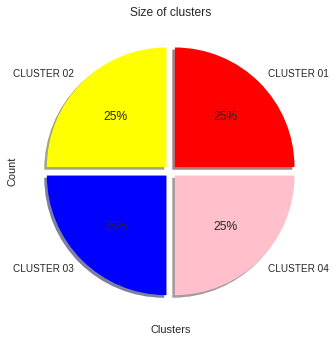

In [ ]:
colors = ['red', 'yellow','blue','pink']
labels = ['CLUSTER 01','CLUSTER 02','CLUSTER 03','CLUSTER 04']
explode = (0.05, 0.05,0.05,0.05)
df_clus.cluster.value_counts().sort_index().plot(kind='pie',autopct='%1.0f%%',colors=colors,shadow=bool,labels=labels, explode=explode)
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Size of clusters')

The above mentioned chart shows us that how equally the data has been clustered using the k means algorithm.

Now we have to find the cluster centers for the entire dataset

In [ ]:
model.cluster_centers_

array([[ 5.42525782, -9.57602898,  2.66597818,  4.96883406, -0.03657404,
        -5.50253436, -6.04243012,  5.21904856, -6.6403918 , -8.2341336 ,
         3.71584254,  9.06360059, -9.92644026,  0.22994172,  6.26923846,
         2.26922479,  4.45356143, -4.15448429,  8.33676182,  4.27718094,
         0.85586483, -7.15436271, -2.52125731,  3.46222328, -1.1660487 ,
        -1.32209687,  2.35854098,  0.236452  ,  3.02142528,  2.01111008,
         6.1189417 ,  0.41092316,  8.17291731, -3.6297462 , -8.18793666],
       [-3.97069493, -7.71626044,  6.57818165, -9.07018609,  2.53371916,
         0.95293828,  6.38511773, -6.02612106,  7.12455872, -2.94702841,
         5.10686855, -4.05842253,  7.68063954, -3.4914937 , -6.70321731,
        -2.1618962 , -8.13242213,  6.42600666, -6.98140808, -2.32369258,
         8.89059075,  9.7486988 , -0.87066953,  6.53297747, -4.97029822,
         1.96504275,  8.06164528,  0.66440794,  1.79515876, -9.19586913,
        -2.84914389, -8.41196035, -3.88468184, -3.

In [ ]:
cluster_center=pd.DataFrame(model.cluster_centers_,columns=df_clus.columns[:35])
cluster_center
# Here we are finding the cluster centre in each of the cluster groups that we have found to see in a dataframe

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,5.425258,-9.576029,2.665978,4.968834,-0.036574,-5.502534,-6.042430,5.219049,-6.640392,-8.234134,...,-1.322097,2.358541,0.236452,3.021425,2.011110,6.118942,0.410923,8.172917,-3.629746,-8.187937
1,-3.970695,-7.716260,6.578182,-9.070186,2.533719,0.952938,6.385118,-6.026121,7.124559,-2.947028,...,1.965043,8.061645,0.664408,1.795159,-9.195869,-2.849144,-8.411960,-3.884682,-3.369298,5.499859
2,4.379543,1.721561,-9.253141,-2.976846,1.275248,-4.013101,0.247002,3.465931,-6.822483,-8.983865,...,-5.048869,0.845788,-5.464405,-2.385907,8.449809,8.511175,1.315130,0.664953,-9.692382,9.557663
3,-9.194634,-1.410014,-3.710544,2.722765,-3.073391,-9.125543,7.585778,5.266300,7.565161,-1.634303,...,-0.083249,9.535110,-1.208170,-3.628217,0.394000,1.566340,7.076106,-8.641537,-0.716133,5.643070


[2 1 1 ... 3 2 1]


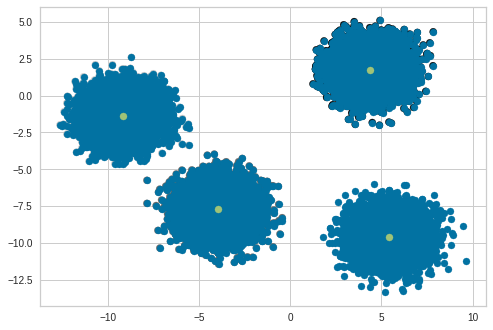

In [ ]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(df_01)
y_kmeans=kmeans.predict(df_01)
print(y_kmeans)
plt.scatter(df_01[:,0],df_01[:,1],c=y_kmeans,s=50)


centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200);
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=1)
pred_y=kmeans.fit_predict(df_01)
plt.scatter(df_01[:,0],df_01[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50)
plt.show()
# Here we see that how the clusters and the cluster centers have been arranged in a graphical view.

So this is the scatter plot for the no.of clusters = 4. Here the center points of the cluster has also been seen with color variation.

# STEP 08: Segmenting the data

Now we have to just group the data according to the respective domains and name the groups that they belong to.

**CLUSTER 01:**

In [ ]:
sorted(zip(list(cluster_center.iloc[0,:]),list(cluster_center.columns)),reverse=True)

[(9.063600585912395, 'Dairy Queen'),
 (8.336761822483648, 'Pop Chips'),
 (8.172917308790886, 'Microsoft'),
 (6.269238457481037, 'Pladis'),
 (6.118941701022445, 'Forever 21'),
 (5.425257817010795, 'Jordan'),
 (5.219048562898282, 'Vans'),
 (4.968834060513263, 'Asus'),
 (4.453561433194704, 'Siemens'),
 (4.27718094335858, 'Juniper'),
 (3.715842538461782, 'H&M'),
 (3.4622232771351076, 'Burberry'),
 (3.0214252795675285, 'Tommy Hilfiger'),
 (2.6659781754992875, 'Samsung'),
 (2.358540981485933, 'Dior'),
 (2.2692247898048015, 'Asics'),
 (2.011110080789257, 'Hollister'),
 (0.8558648327773946, 'Huawei'),
 (0.4109231633350885, 'Colavita'),
 (0.2364520017192404, 'Scabal'),
 (0.22994171736622215, 'Hewlett Packard'),
 (-0.036574035442841574, 'Udis'),
 (-1.166048698923873, 'Mi'),
 (-1.322096874641074, 'LG'),
 (-2.521257305372898, 'IBM'),
 (-3.629746198609589, 'Jiffy mix'),
 (-4.154484290951313, 'J.M. Smucker'),
 (-5.502534359933534, 'Mondelez International'),
 (-6.042430118617076, 'Wrangler'),
 (-6.64

**CLUSTER 02:**

In [ ]:
sorted(zip(list(cluster_center.iloc[1,:]),list(cluster_center.columns)),reverse=True)

[(9.748698804978046, 'Compaq'),
 (8.890590750623238, 'Huawei'),
 (8.061645284280797, 'Dior'),
 (7.6806395410345445, 'Fendi'),
 (7.124558724025372, 'Fila'),
 (6.5781816500072505, 'Samsung'),
 (6.532977471882911, 'Burberry'),
 (6.426006662274, 'J.M. Smucker'),
 (6.385117731976183, 'Wrangler'),
 (5.4998587887917925, 'Kraft'),
 (5.106868549800029, 'H&M'),
 (2.533719156500135, 'Udis'),
 (1.9650427542947868, 'LG'),
 (1.7951587570005516, 'Tommy Hilfiger'),
 (0.952938275439287, 'Mondelez International'),
 (0.664407943076398, 'Scabal'),
 (-0.8706695339707431, 'IBM'),
 (-2.161896198574519, 'Asics'),
 (-2.323692584283639, 'Juniper'),
 (-2.849143888353445, 'Forever 21'),
 (-2.9470284123579518, 'Brooks'),
 (-3.3692984731092994, 'Jiffy mix'),
 (-3.4914936974542443, 'Hewlett Packard'),
 (-3.884681835650942, 'Microsoft'),
 (-3.970694933853467, 'Jordan'),
 (-4.05842253152505, 'Dairy Queen'),
 (-4.970298220169599, 'Mi'),
 (-6.026121063001325, 'Vans'),
 (-6.703217307119263, 'Pladis'),
 (-6.98140807985405

**CLUSTER 03:**

In [ ]:
sorted(zip(list(cluster_center.iloc[2,:]),list(cluster_center.columns)),reverse=True)

[(9.557663061255525, 'Kraft'),
 (8.511175087148567, 'Forever 21'),
 (8.449809193467432, 'Hollister'),
 (7.706668371108147, 'Hewlett Packard'),
 (5.040714201446189, 'Siemens'),
 (4.900501078779853, 'Pop Chips'),
 (4.379543153182833, 'Jordan'),
 (3.46593101826676, 'Vans'),
 (2.8988464590414784, 'Burberry'),
 (1.9528200700792122, 'Huawei'),
 (1.721560999969328, 'Gatorade'),
 (1.3151298585668565, 'Colavita'),
 (1.2752482713904412, 'Udis'),
 (0.8457875879566705, 'Dior'),
 (0.6649525175023221, 'Microsoft'),
 (0.24700193249157465, 'Wrangler'),
 (-0.6200999485118749, 'Juniper'),
 (-2.3859068711536486, 'Tommy Hilfiger'),
 (-2.6980733171884426, 'Pladis'),
 (-2.976845513968345, 'Asus'),
 (-3.25146434792709, 'H&M'),
 (-4.013101112942309, 'Mondelez International'),
 (-5.048869236750229, 'LG'),
 (-5.464405105394368, 'Scabal'),
 (-5.634217010585372, 'Asics'),
 (-6.315157293404074, 'IBM'),
 (-6.431590057798774, 'Fendi'),
 (-6.82248278884877, 'Fila'),
 (-7.047360909984636, 'Compaq'),
 (-7.8536701887006

**CLUSTER 04:**

In [ ]:
sorted(zip(list(cluster_center.iloc[3,:]),list(cluster_center.columns)),reverse=True)

[(9.581089586683728, 'Burberry'),
 (9.535110443611083, 'Dior'),
 (7.58577778692104, 'Wrangler'),
 (7.565160914325467, 'Fila'),
 (7.076106420382148, 'Colavita'),
 (5.643070363076578, 'Kraft'),
 (5.266300017439274, 'Vans'),
 (2.722764863784361, 'Asus'),
 (2.139444486236431, 'H&M'),
 (1.9463179369117198, 'Fendi'),
 (1.5663403070453437, 'Forever 21'),
 (1.3186834087638335, 'Juniper'),
 (1.147497585191073, 'Pop Chips'),
 (0.3940003919273012, 'Hollister'),
 (0.2677240590724129, 'Dairy Queen'),
 (-0.08324890093581105, 'LG'),
 (-0.5006317900804378, 'Huawei'),
 (-0.7161332502999205, 'Jiffy mix'),
 (-1.2081699410526716, 'Scabal'),
 (-1.4100143734860704, 'Gatorade'),
 (-1.6343033194882075, 'Brooks'),
 (-3.073391191000987, 'Udis'),
 (-3.202500127495072, 'Mi'),
 (-3.6282170514921326, 'Tommy Hilfiger'),
 (-3.7105437192667257, 'Samsung'),
 (-3.9401268909142013, 'Siemens'),
 (-3.981304122704552, 'Pladis'),
 (-4.138614996699963, 'Compaq'),
 (-4.757805738117177, 'Hewlett Packard'),
 (-5.166994381439883,

# STEP 09: Naming the cluster from the data

From the above section we have segmented the dataset and we have clustered into four different groups which are discused below.

**CLUSTER 01 - TECH**

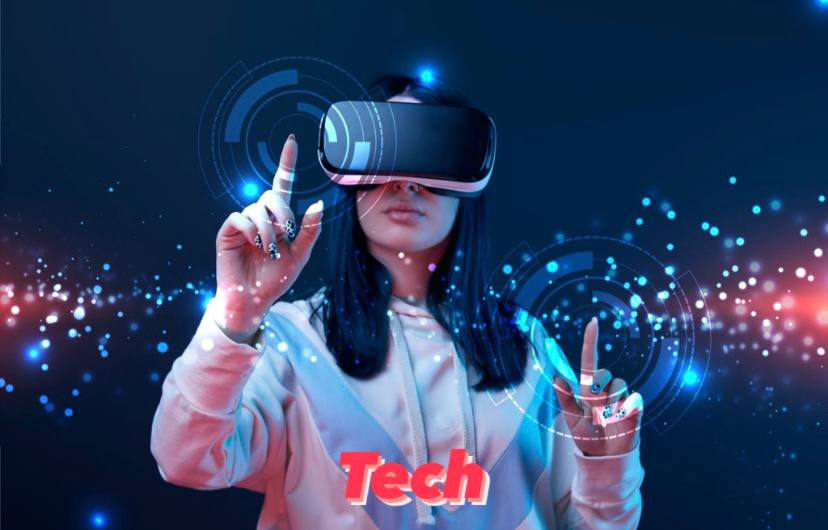

**CLUSTER 01 - APPARELS**

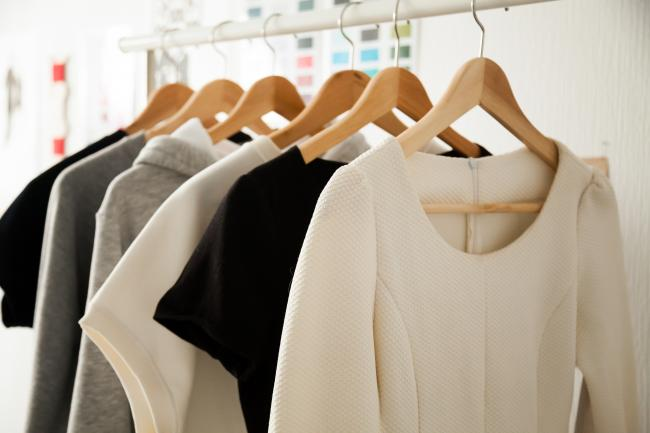

**CLUSTER 04 - FOOD**

food.avif

**CLUSTER 04 - FOOTWEAR**

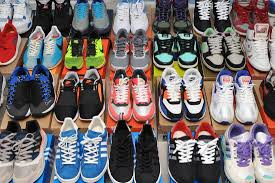

# CONCLUSION:

By applying KMeans Clustering machine learning algorithm we found the k-value of the given dataset.

Approximately the adviseble number of clusters is 4 which was found out specifically by the  Silhouette Score method and analyzing using it.

The unsupervised e-commerce customer dataset is been segmented into four main gropus which are :

        01) TECH
        02) APPARELS
        03) FOOD
        04) FOOTWEAR
Here these clusters helps the E-commerce Companies to suggest the customer there by increasing the sales.

The clusters are also helpful in finding the interests of the customers so that the particular companies can offer them.